In [2]:
import pandas as pd

In [3]:
train_data=pd.read_csv("../datasets/assignment/train_set.csv")
test_data=pd.read_csv("../datasets/assignment/test_set.csv")

In [4]:
train_data

,userId,movieId,t,rating,preference
0,31231,1193,2001-03-14,5.0,1.0
1,32077,1284,1999-11-02,4.0,1.0
2,37618,368,2008-01-25,3.0,0.0
3,76002,490,1996-07-04,4.0,1.0
4,79452,2132,2012-05-16,3.0,0.0
...,...,...,...,...,...
15971861,127704,3505,2000-03-30,4.0,1.0
15971862,125972,1242,1999-12-14,4.0,1.0
15971863,64040,434,1996-11-19,3.0,1.0
15971864,105127,356,2013-02-18,4.0,1.0


In [5]:
test_data

,userId,movieId,t,preference
0,118853,4232,2002-10-11,0.0
1,1734,1701,2015-02-03,1.0
2,65850,535,2002-07-16,0.0
3,99208,6832,2005-04-13,1.0
4,133444,318,2000-12-08,1.0
...,...,...,...,...
3992962,69753,367,2008-03-14,-1.0
3992963,50421,1961,2007-06-06,0.0
3992964,101721,372,1997-05-11,0.0
3992965,80928,2469,2001-07-16,-1.0


In [6]:
train_data.preference.unique()

array([ 1.,  0., -1.])

In [7]:
user_train_input=train_data['userId'].values.tolist()
user_test_input=test_data['userId'].values.tolist()

In [8]:
item_train_input=train_data['movieId'].values.tolist()
item_test_input=test_data['movieId'].values.tolist()


In [9]:
label_train_input=train_data['preference'].values.tolist()
label_test_input=test_data['preference'].values.tolist()

In [10]:
print("user_train_input_len: " +str(len(user_train_input)))
print("user_train_input_max: "+str(max(user_train_input)))
print("train_user_id_unique: "+str(len(train_data.userId.unique())))
print("item_train_input_len: " +str(len(item_train_input)))
print("item_train_input_max: "+str(max(item_train_input)))
print("train_item_id_unique: "+str(len(train_data.movieId.unique())))

user_train_input_len: 15971866
user_train_input_max: 138493
train_user_id_unique: 138493
item_train_input_len: 15971866
item_train_input_max: 130490
train_item_id_unique: 15451


In [11]:
print("user_test_input_len: " +str(len(user_test_input)))
print("user_test_input_max: "+str(max(user_test_input)))
print("test_user_id_unique: "+str(len(test_data.userId.unique())))
print("item_test_input_len: " +str(len(item_test_input)))
print("item_test_input_max: "+str(max(item_test_input)))
print("test_item_id_unique: "+str(len(test_data.movieId.unique())))

user_test_input_len: 3992967
user_test_input_max: 138493
test_user_id_unique: 138325
item_test_input_len: 3992967
item_test_input_max: 130490
test_item_id_unique: 15343


In [12]:
num_users=len(train_data.userId.unique())
num_items=len(train_data.movieId.unique())

In [13]:
num_users=len(train_data.userId.unique())+1
num_items=max(item_train_input)+1

In [14]:
print(num_users)
print(num_items)

138494
130491


In [15]:
num_factors=16

In [16]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import regularizers



In [78]:
# input layer
user_input_layer=layers.Input(shape=(1,), dtype='int32', name='user_input')
item_input_layer=layers.Input(shape=(1,), dtype='int32', name='item_input')

# embedding layer
user_embedding_layer=layers.Embedding(input_dim=num_users, 
                               output_dim=num_factors, 
                               embeddings_regularizer=regularizers.l2(0.),
                               name='user_embedding'
                              )(user_input_layer)
item_embedding_layer=layers.Embedding(input_dim=num_items, 
                               output_dim=num_factors, 
                               embeddings_regularizer=regularizers.l2(0.),
                               name='item_embedding'
                              )(item_input_layer)

# flatten embedding vector
user_latent=layers.Flatten()(user_embedding_layer)
item_latent=layers.Flatten()(item_embedding_layer)

# element wise product
ew_product=layers.multiply([user_latent, item_latent])
ew_product=layers.BatchNormalization()(ew_product)

dense=layers.Dense(128, activation='tanh')(ew_product)
prediction=layers.Dense(1, activation='tanh', name='prediction')(dense)

model=Model([user_input_layer, item_input_layer], prediction)


In [79]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
item_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 16)        2215904     user_input[0][0]                 
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 16)        2087856     item_input[0][0]                 
____________________________________________________________________________________________

In [21]:
import numpy as np

In [80]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae', 'mse'])


In [28]:
import os

In [ ]:
from sklearn.model_selection import KFold
n_split=3
for train_index,test_index in KFold(n_split).split(X):
    user_train, user_validation=user_train_input[train_index], user_train_input[test_index]
    item_train, item_validation=item_train_input[train_index], item_train_input[test_index]
    label_train, label_validation=label_train_input[train_index], label_train_input[test_index]
    

In [98]:
checkpoint_path="training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [100]:
history=model.fit([np.array(user_train_input), np.array(item_train_input)], 
                  np.array(label_train_input),
                  batch_size=64,
                  epochs=20,
                  callbacks = [cp_callback]
                 )

Train on 15971866 samples
Epoch 1/20
15971840/15971866 [============================>.] - ETA: 0s - loss: 0.4645 - mae: 0.5550 - mse: 0.4645
Epoch 00001: saving model to training_2/cp.ckpt
15971866/15971866 [==============================] - 6037s 378us/sample - loss: 0.4645 - mae: 0.5550 - mse: 0.4645
Epoch 2/20
15971776/15971866 [============================>.] - ETA: 0s - loss: 0.4331 - mae: 0.5246 - mse: 0.4331
Epoch 00002: saving model to training_2/cp.ckpt
15971866/15971866 [==============================] - 5940s 372us/sample - loss: 0.4331 - mae: 0.5246 - mse: 0.4331
Epoch 3/20
15971776/15971866 [============================>.] - ETA: 0s - loss: 0.4150 - mae: 0.5067 - mse: 0.4150
Epoch 00003: saving model to training_2/cp.ckpt
15971866/15971866 [==============================] - 6052s 379us/sample - loss: 0.4150 - mae: 0.5067 - mse: 0.4150
Epoch 4/20
15971840/15971866 [============================>.] - ETA: 0s - loss: 0.4035 - mae: 0.4953 - mse: 0.4035
Epoch 00004: saving model

In [101]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,epoch
15,0.371947,0.462251,0.371945,15
16,0.371214,0.461466,0.371216,16
17,0.370591,0.460760,0.370589,17
18,0.369973,0.460026,0.369973,18
19,0.369404,0.459432,0.369405,19


In [102]:
test_predictions = model.predict([np.array(user_test_input), np.array(item_test_input)]).flatten()

In [103]:
ans=0
for i in range(len(test_predictions)):
    if label_test_input==0:
        continue
    elif label_test_input[i]==1 and test_predictions[i]>0:
        ans+=1
    elif label_test_input[i]==-1 and test_predictions[i]<0:
        ans+=1
    else:
        ans-=1
    

In [104]:
print(ans)

893973


In [86]:
print(str(test_predictions))

[0.08621738 0.35817236 0.61503    ... 0.33055553 0.07205181 0.6593466 ]


In [108]:
min(test_predictions)

-0.9724382

In [88]:
min(label_train_input)

-1.0

In [89]:
min(label_test_input)

-1.0

In [109]:
a=pd.DataFrame()

In [110]:
a['label']=label_test_input

In [111]:
a['pred']=test_predictions

In [112]:
a[:20]

,label,pred
0,0.0,0.656393
1,1.0,0.496724
2,0.0,0.919269
3,1.0,0.769740
4,1.0,0.661894
5,1.0,0.616381
6,0.0,0.737767
7,0.0,-0.040979
8,-1.0,0.707627
9,1.0,0.727128


In [113]:
a['label'].value_counts()

 1.0    2187564
 0.0    1019838
-1.0     785565
Name: label, dtype: int64

In [115]:
def one(x):
    if x<0:
        return -1
    elif x>0:
        return 1
    else:
        return 0

In [118]:
a['one']=[one(i) for i in test_predictions]

In [119]:
a['one'].value_counts()

 1    3005288
-1     987679
Name: one, dtype: int64

In [114]:
a['pred'].value_counts()

 0.861115    8
 0.814279    8
 0.902949    7
 0.892830    7
 0.906071    7
            ..
 0.192704    1
 0.192704    1
-0.192704    1
 0.192703    1
-0.729536    1
Name: pred, Length: 3575905, dtype: int64

In [68]:
label_test_input[10:]

[-1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 1.0,
 0.0,
 -1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 -1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 0.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 0.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 -1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 0.0,
 -1.0,
 -1.0,
 1.0,
 0.0,
 0.0

In [67]:
list(test_predictions)[10:]

[0.023696575,
 0.5513149,
 0.5720376,
 0.90404993,
 0.07423127,
 0.073088996,
 0.1072138,
 0.08485682,
 0.28691074,
 0.015842209,
 0.74084914,
 0.62128884,
 0.1403531,
 0.0029626598,
 0.6541801,
 0.43505695,
 0.00015962264,
 0.010798017,
 0.7794127,
 0.026060564,
 0.49222526,
 0.60625905,
 0.029416937,
 0.0025561347,
 0.22379093,
 0.69869035,
 0.0261247,
 0.8970507,
 6.0420894e-05,
 0.010608318,
 0.31576213,
 0.7013248,
 0.031174002,
 0.48499605,
 5.0564322e-05,
 1.8319271e-06,
 0.038226612,
 0.08339808,
 0.4284441,
 0.009999825,
 0.50652045,
 0.38958913,
 0.73669153,
 0.14350939,
 0.910863,
 0.60107666,
 0.7322822,
 0.17103119,
 0.6193472,
 0.92816126,
 0.30967665,
 0.031139975,
 0.66544724,
 0.004225259,
 0.40288317,
 0.81224096,
 0.21667722,
 0.008793012,
 0.58961135,
 0.7089185,
 0.0005027621,
 0.5241373,
 0.35741234,
 0.6454831,
 0.9600248,
 0.8739203,
 0.015662583,
 0.09595481,
 0.97680885,
 0.6489279,
 0.74063224,
 0.63205725,
 0.5795227,
 0.046018578,
 0.47467202,
 0.050233584,

In [62]:
test_predictions.shape

(3992967,)

In [36]:
import matplotlib.pyplot as plt

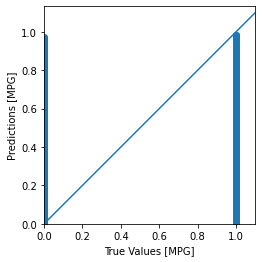

In [96]:
plt.scatter(label_test_input, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
class model_all(object):
    def model_fit(self, model, n_batch_size=256, n_epochs=5):
        num_factors=self.num_factors
        model=self.model
        